In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


- remove/replace null value
- remove last row which is total
- check unique value if there is error value
- extract date to year, month, day and time

In [4]:
df.shape

# contains 1156 rows and 7 columns

(1156, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## FEATURE ENGINEERING

In [6]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
df.drop([1155],axis=0,inplace=True)

In [8]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [9]:
df.nunique()

START_DATE*    1154
END_DATE*      1154
CATEGORY*         2
START*          177
STOP*           188
MILES*          256
PURPOSE*         10
dtype: int64

**drop duplicated row**

In [10]:
df[df.duplicated()] # check for duplicated values

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [11]:
df.drop([492],axis=0,inplace=True)

**fill missing value in PURPOSE***

In [12]:
df["PURPOSE*"].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [13]:
df1 = df.copy()
df1

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [14]:
df1["PURPOSE*"].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [15]:
purpose = {'Meal/Entertain':0,'Errand/Supplies':1,'Meeting':2,'Customer Visit':3,'Temporary Site':4,'Between Offices':5,
           'Charity ($)':6,'Commute':7,'Moving':8,'Airport/Travel':9}

df1 = df1.replace({"PURPOSE*":purpose})
df1

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,0.0
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,1.0
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,2.0
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,3.0
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,2.0
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,4.0
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,2.0
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,4.0


In [16]:
df1.dropna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,0.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,1.0
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,2.0
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,3.0
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,0.0
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,2.0
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,4.0
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,2.0
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,4.0


In [17]:
round(df1["PURPOSE*"].mean()) # 2 is Meeting

2

In [18]:
df["PURPOSE*"] = df["PURPOSE*"].fillna("Meeting")

In [19]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


**clean typo error**

In [20]:
df["START*"] = df["START*"].str.replace("?","a")
df["STOP*"] = df["STOP*"].str.replace("?","a")

In [21]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


**extract timestamp to separate columns**

In [22]:
df['month'] = pd.to_datetime(df['START_DATE*']).dt.month
df['Year'] = pd.to_datetime(df['START_DATE*']).dt.year
df['Day'] = pd.to_datetime(df['START_DATE*']).dt.day
df['Hour'] = pd.to_datetime(df['START_DATE*']).dt.hour

In [23]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,Year,Day,Hour
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,2016,1,21
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1,2016,2,1
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,2016,2,20
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,2016,5,17
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,2016,6,14
...,...,...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting,12,2016,31,1
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site,12,2016,31,13
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,12,2016,31,15
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,12,2016,31,21


In [24]:
df['day_of_week'] = pd.to_datetime(df['START_DATE*']).dt.dayofweek

In [25]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

df = df.replace({"day_of_week": days})
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,Year,Day,Hour,day_of_week
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,2016,1,21,Fri
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1,2016,2,1,Sat
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,2016,2,20,Sat
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,2016,5,17,Tue
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,2016,6,14,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting,12,2016,31,1,Sat
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site,12,2016,31,13,Sat
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,12,2016,31,15,Sat
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,12,2016,31,21,Sat


In [26]:
import calendar

df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,Year,Day,Hour,day_of_week
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,2016,1,21,Fri
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Jan,2016,2,1,Sat
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,2016,2,20,Sat
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,2016,5,17,Tue
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,2016,6,14,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting,Dec,2016,31,1,Sat
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site,Dec,2016,31,13,Sat
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,Dec,2016,31,15,Sat
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,Dec,2016,31,21,Sat


**create new ROUND TRIP column**

In [27]:
def round(x):
    if x['START*'] == x['STOP*']:
        return 'Yes'
    else:
        return 'No'
    
df['ROUND_TRIP*'] = df.apply(round, axis=1)

In [28]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,Year,Day,Hour,day_of_week,ROUND_TRIP*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,2016,1,21,Fri,Yes
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Jan,2016,2,1,Sat,Yes
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,2016,2,20,Sat,Yes
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,2016,5,17,Tue,Yes
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,2016,6,14,Wed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting,Dec,2016,31,1,Sat,Yes
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site,Dec,2016,31,13,Sat,No
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,Dec,2016,31,15,Sat,Yes
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,Dec,2016,31,21,Sat,No


In [29]:
df.drop(df.index[df['START*'] == 'Unknown Location'],inplace=True)

In [30]:
df.drop(df.index[df['STOP*'] == 'Unknown Location'],inplace=True)

**clean dataset**

In [31]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,Year,Day,Hour,day_of_week,ROUND_TRIP*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,2016,1,21,Fri,Yes
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Jan,2016,2,1,Sat,Yes
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,2016,2,20,Sat,Yes
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,2016,5,17,Tue,Yes
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,2016,6,14,Wed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting,Dec,2016,30,16,Fri,Yes
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit,Dec,2016,30,23,Fri,Yes
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting,Dec,2016,31,1,Sat,Yes
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,Dec,2016,31,21,Sat,No


## EXPLORATORY DATA ANALYSIS

Querries

- Which Category has the highest frequency
- Miles (max,mean,min) 
- which purpose had the longest miles (compare and conclude)
- which day has the highest frequency
- is there any trip took more than one day
- how long is the trip

use coefficient to see how each features react to each other features

In [32]:
# if there is skewness in data set

df.skew()

MILES*    7.695861
Year      0.000000
Day       0.035469
Hour     -0.673858
dtype: float64

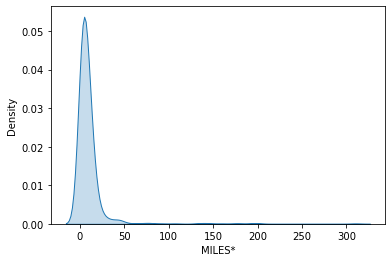

In [33]:
sns.kdeplot(x='MILES*',data=df,fill=True);

# miles is right-skewed data

**Category**

In [34]:
df["CATEGORY*"].value_counts() 

Business    870
Personal     73
Name: CATEGORY*, dtype: int64

In [35]:
colors = sns.color_palette("Set2")

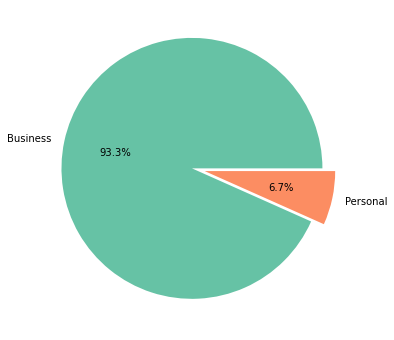

In [36]:
category =[1077,77]
labels = ['Business',"Personal"]

plt.figure(figsize=(12,6))
plt.axis=['equal']
explode = (0.05,0.05)
plt.pie(category,labels=labels,radius=1.0,autopct='%0.1f%%',explode=explode,colors=colors);

# higher business trips compared to personal trip (imbalance class)

**Purpose**

In [37]:
df["PURPOSE*"].value_counts()

Meeting            535
Meal/Entertain     148
Errand/Supplies    111
Customer Visit      92
Temporary Site      32
Between Offices     18
Moving               4
Charity ($)          1
Airport/Travel       1
Commute              1
Name: PURPOSE*, dtype: int64

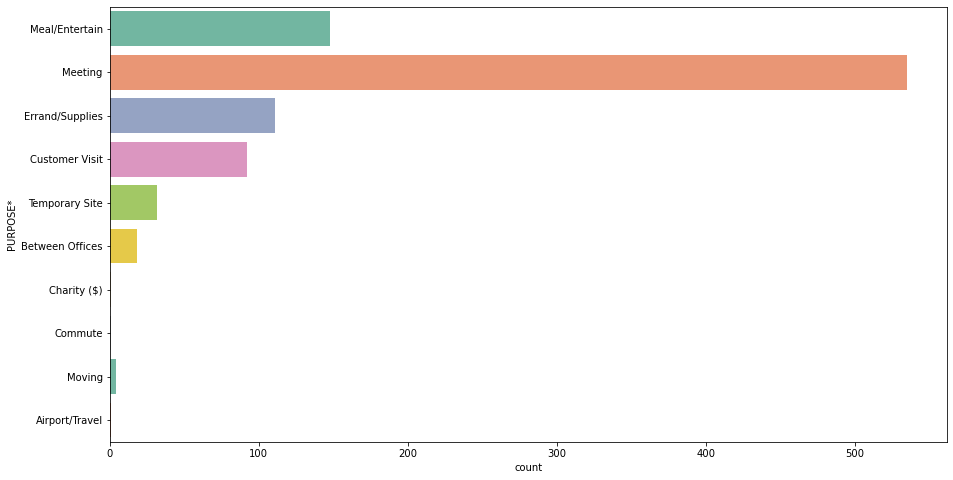

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(y='PURPOSE*',data=df,palette=colors);

# meeting is the most reason why people book uber

In [39]:
df.groupby("PURPOSE*").describe()["MILES*"]

,count,mean,std,min,25%,50%,75%,max
PURPOSE*,,,,,,,,
Airport/Travel,1.0,4.100000,NaN,4.1,4.100,4.10,4.100,4.1
Between Offices,18.0,10.944444,8.458913,1.9,5.200,11.60,12.350,39.2
Charity ($),1.0,15.100000,NaN,15.1,15.100,15.10,15.100,15.1
Commute,1.0,180.200000,NaN,180.2,180.200,180.20,180.200,180.2
Customer Visit,92.0,21.686957,42.294226,0.8,5.375,8.00,16.625,310.3
Errand/Supplies,111.0,3.881982,3.531809,0.5,1.800,3.10,4.650,22.3
Meal/Entertain,148.0,5.569595,5.107986,0.6,2.500,4.05,6.500,36.5
Meeting,535.0,9.995701,20.048963,0.6,2.500,5.90,10.400,201.0
Moving,4.0,4.550000,1.181807,3.3,3.900,4.40,5.050,6.1


**Locations**

In [40]:
print(df["START*"].nunique())
print(df["STOP*"].nunique())

173
185


In [41]:
df["START*"].value_counts().head()

Cary           200
Morrisville     85
Whitebridge     68
Durham          36
Islamabad       29
Name: START*, dtype: int64

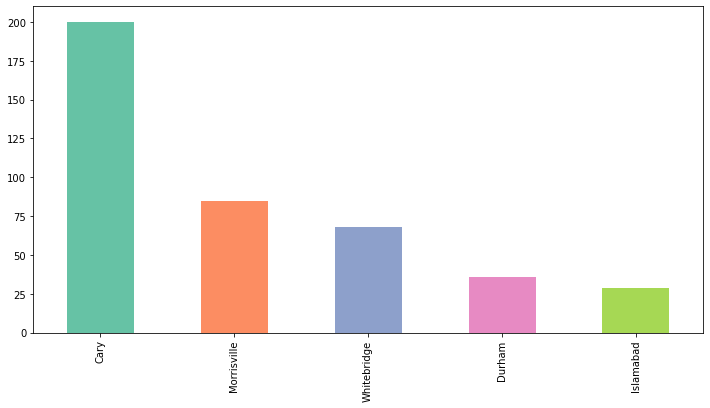

In [42]:
plt.figure(figsize=(12,6))
df["START*"].value_counts().head().plot(kind='bar',color=colors);

# top 5 most popular start and stop locations

In [43]:
df["STOP*"].value_counts().head()

Cary           202
Morrisville     83
Whitebridge     65
Durham          36
Islamabad       30
Name: STOP*, dtype: int64

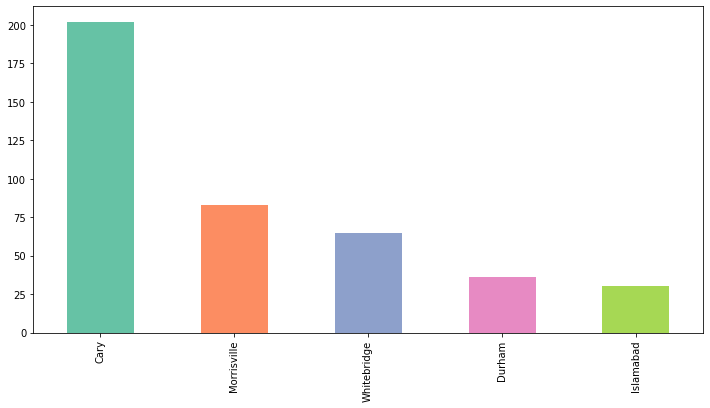

In [44]:
plt.figure(figsize=(12,6))
df["STOP*"].value_counts().head().plot(kind='bar',color=colors);

**Day of Week**

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


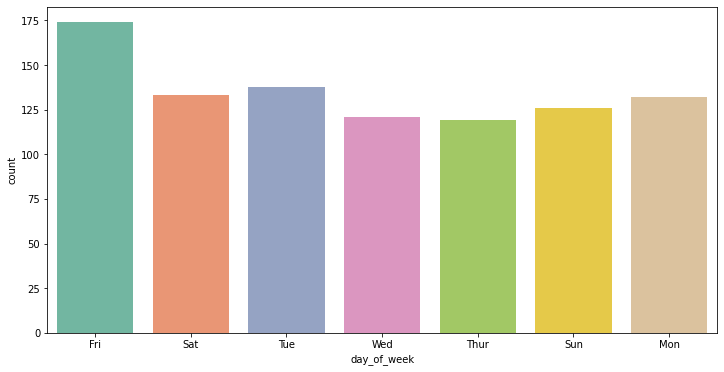

In [45]:
plt.figure(figsize=(12,6))

sns.countplot("day_of_week",data=df,palette=colors);

# friday had the highest booking trips

**Month**

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


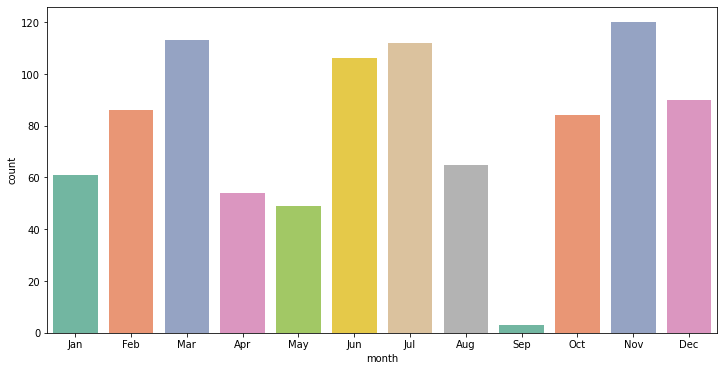

In [46]:
plt.figure(figsize=(12,6))

sns.countplot("month",data=df,palette=colors);

# trips highest on November 
# trips lowest on September (really low)

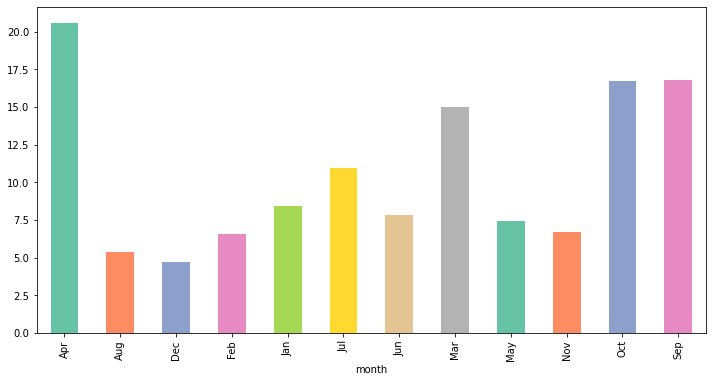

In [47]:
plt.figure(figsize=(12,6))
df.groupby("month").mean()["MILES*"].plot(kind='bar',color=colors);

# April had the most long trips
# october september had the the same miles

**Round Trip**

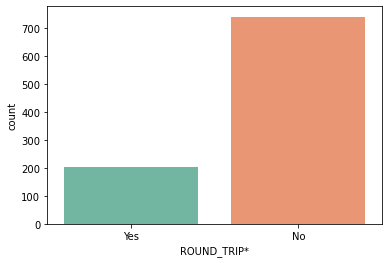

In [48]:
sns.countplot(x='ROUND_TRIP*',data=df,palette=colors);

# less round trip
# had higher one way trip

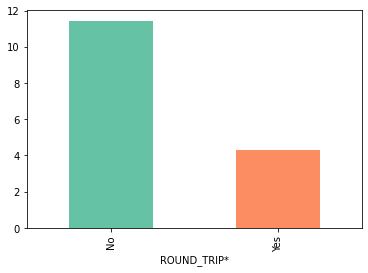

In [49]:
df.groupby("ROUND_TRIP*").mean()['MILES*'].plot(kind='bar',color=colors);

**Drive Time**

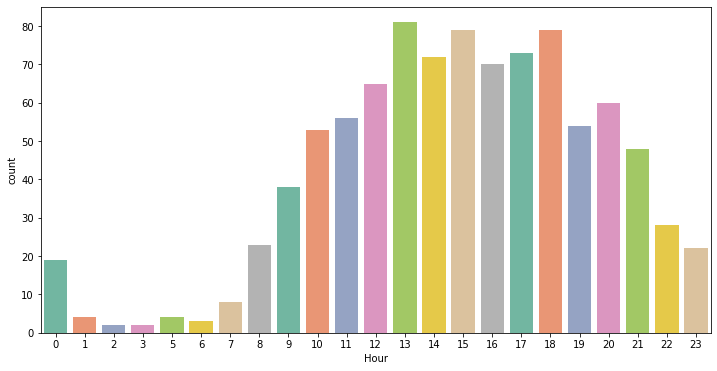

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour',data=df,palette=colors);

**mapping intergers to string**

In [51]:
m = {}

for i in df['Hour']:
    
    if i >= 17:
        m.setdefault(i,'Day')
        
    else:
        m.setdefault(i,'Night')
            
df['DRIVE_TIME'] = df['Hour'].map(m)

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,Year,Day,Hour,day_of_week,ROUND_TRIP*,DRIVE_TIME
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,2016,1,21,Fri,Yes,Day
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Jan,2016,2,1,Sat,Yes,Night
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,2016,2,20,Sat,Yes,Day
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,2016,5,17,Tue,Yes,Day
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,2016,6,14,Wed,No,Night


In [52]:
df["DRIVE_TIME"].value_counts()

Night    579
Day      364
Name: DRIVE_TIME, dtype: int64

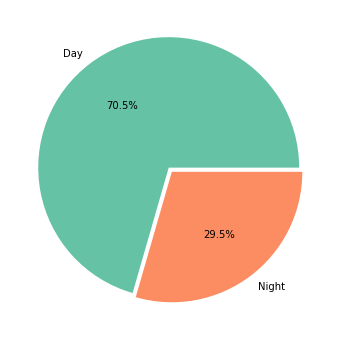

In [53]:
category =[814,340]
labels = ['Day',"Night"]

plt.figure(figsize=(12,6))
plt.axis=['equal']
explode = (0.02,0.02)
plt.pie(category,labels=labels,radius=1.0,autopct='%0.1f%%',explode=explode,colors=colors);

# a lot more daytime trip compared to night trips
# most daytime trip is on 10 - 17 pm
# early morning had lower trips
# most night trip is on 18-22

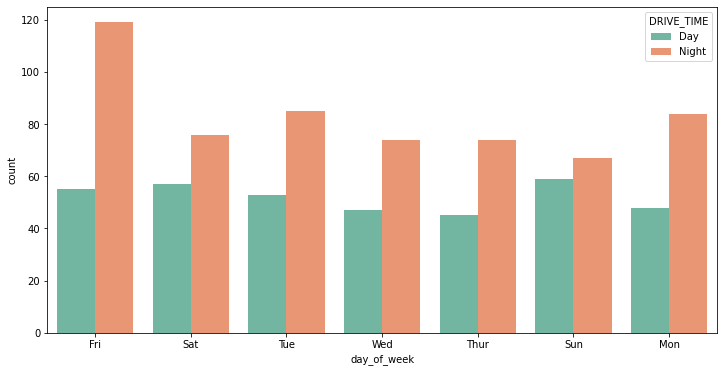

In [54]:
plt.figure(figsize=(12,6))

sns.countplot(x='day_of_week',hue='DRIVE_TIME',data=df,palette=colors);

# everyday had more night trip compared to daytrip
# most nightrip is on friday night

**Miles**

In [55]:
df["MILES*"].describe()

count    943.000000
mean       9.905302
std       21.484199
min        0.500000
25%        2.600000
50%        5.300000
75%        9.900000
max      310.300000
Name: MILES*, dtype: float64

In [56]:
m = {}

for i in df['MILES*']:
    
    if i < 10:
        m.setdefault(i,'0-10 miles')
    elif i >= 10 and i < 20:
        m.setdefault(i,'10-20 miles')
    elif i >= 20 and i < 30:
        m.setdefault(i,'20-30 miles')
    elif i >= 30 and i < 40:
        m.setdefault(i,'30-40 miles')
    elif i >= 40 and i < 50:
        m.setdefault(i,'40-50 miles')
    else:
        m.setdefault(i,'Above 50 miles')
            
df['MILES_RANGE'] = df['MILES*'].map(m)

In [57]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,Year,Day,Hour,day_of_week,ROUND_TRIP*,DRIVE_TIME,MILES_RANGE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,2016,1,21,Fri,Yes,Day,0-10 miles
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Jan,2016,2,1,Sat,Yes,Night,0-10 miles
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,2016,2,20,Sat,Yes,Day,0-10 miles
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,2016,5,17,Tue,Yes,Day,0-10 miles
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,2016,6,14,Wed,No,Night,Above 50 miles


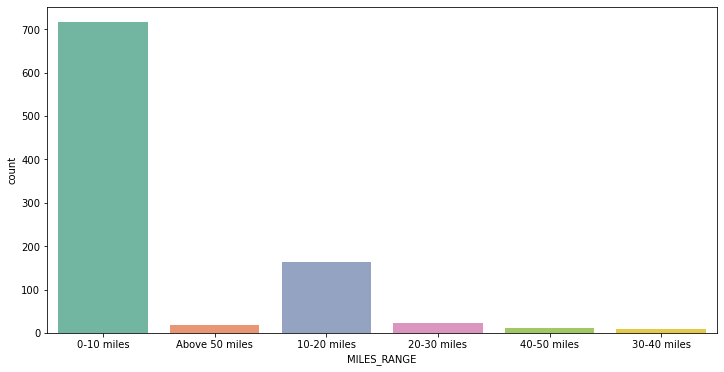

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x='MILES_RANGE',data=df,palette=colors);

# most trip is only 0-10 miles trips

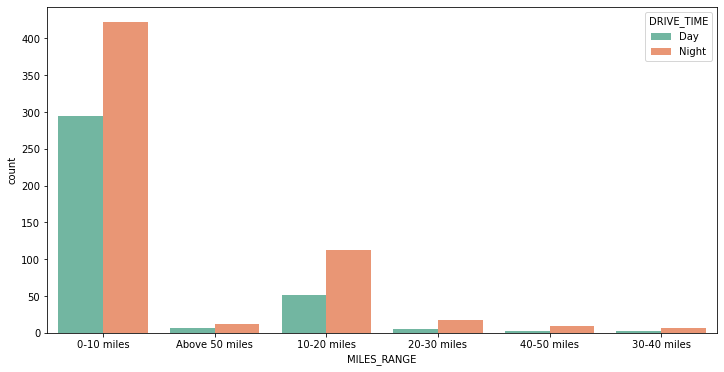

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x='MILES_RANGE',data=df,hue="DRIVE_TIME",palette=colors);

In [60]:
df.groupby("month").mean()["MILES*"].sort_values(ascending=False)

month
Apr    20.611111
Sep    16.800000
Oct    16.735714
Mar    14.990265
Jul    10.933929
Jan     8.408197
Jun     7.808491
May     7.424490
Nov     6.722500
Feb     6.596512
Aug     5.401538
Dec     4.705556
Name: MILES*, dtype: float64

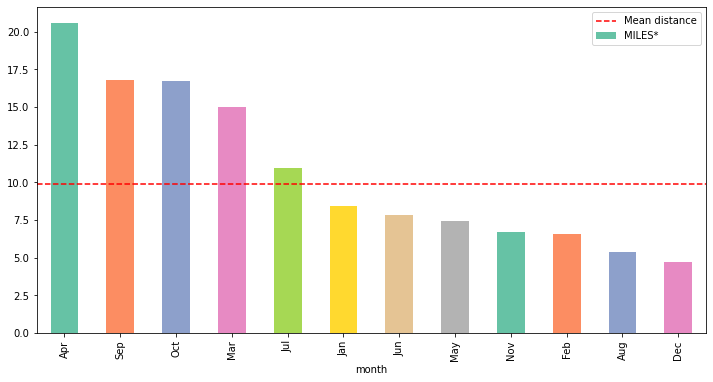

In [61]:
plt.figure(figsize=(12,6))
df.groupby('month').mean()['MILES*'].sort_values(ascending = False).plot(kind='bar',color=colors)
plt.axhline(df['MILES*'].mean(), linestyle='--', color='red', label='Mean distance')
plt.legend();

## CONCLUSIONS

- Dataset contains 1156 rows and 7 columns 
- After removing missing values and added some new features - dataset contain 943 rows and 15 columns
- Miles columns is right-skewed data
- Higher business trips compared to personal trip (imbalance class)
- Meeting is the most reason why people book uber followed by meal/entertain
- Top 5 most popular start and stop locations are (Cary, Morrisville, Whitebridge, Durham and Islamabad)
- Friday had the highest booking trips while other day had almost similar number of trips
- Number of trips are the highest on November 
- Number of trips on September are really low
- Dataset contains had higher one way trip
- Dataset contains a lot more daytime trip compared to night trips
- Most daytime trip is on 10 am - 17 pm
- Early morning had lower trips
- Most night trip is on 18 pm -22 pm
- Everyday uber had more night trip compared to daytrip
- Most nightrip is on friday night
- Most trip is only 0-10 miles trips
- April had the longest trips
- October and September had the the same miles 